# Steps:
- Read an image file.
- The image file will consist of RGB layers. So, convert all RGB layers to each vector. The image will change from (m,n,p) to (m*n,p).
- Pick some number of centroids (Using Elbow Method) and then radomly initialize them.
- After that, give each of the pixel tuple to nearest centroid using Euclidean Distance.
- Now, we have got the centroids. The next task is to optimize the centroids.
- Take some number of epochs. Compute average of points in each cluster and then reinitialize the centroids to those average or mean points. 
- Again give each of the pixel tuple nearest centroid using Euclidean Distance.
- Repeat for those number of epochs.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/image.jpg


In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Read Image File

In [3]:
img=mpimg.imread('/kaggle/input/image.jpg')

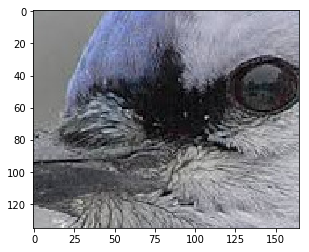

In [4]:
imgplot = plt.imshow(img)

# Normalize the pixels

In [5]:
img=img/255

In [6]:
img.shape

(135, 165, 3)

# Reshape to 2D from 3D 

In [7]:
img_new=np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

In [8]:
m,n=img_new.shape

# Select Some k number of clusters

In [9]:
k=2 #Number of colors we are choosing out of the image to be compressed

# Randomly initialize clusters to some pixel values

In [10]:
centroids=np.zeros((k,n))

In [11]:
# random initialization of Centroids.  
for i in range(k): 
    centroids[i] = img_new[int(np.random.random(1)*1000)]

# Function to calculate distance between cluster and pixels

In [12]:
def distance(x1,y1,z1,x2,y2,z2): 
    dist = np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)+np.square(z1 - z2))
    return dist 

# Allocate each pixel its nearest centroid based upon pixel value difference

In [13]:
def nearest_centroid(image,centroid):
    centroids_dictionary={}
    for i in range(image.shape[0]):
        dlist=[]
        for j in range(k):
            dlist.append(distance(image[i][0],image[i][1],image[i][2],centroid[j][0],centroid[j][1],centroid[j][2]))
        min_dist=np.argmin(dlist)
        centroids_dictionary[i]=min_dist   
    return centroids_dictionary

# Optimize

In [14]:
def optimize(image,centroid,iterations):
    centroid_dictionary = nearest_centroid(image,centroid)
    for lo in tqdm(range(iterations)):
        print('Epoch'+str(lo))
        for key,value in centroid_dictionary.items():
            s=np.zeros((3,))
            count=0
            for i in range(img_new.shape[0]):
                if centroid_dictionary[i]==value:
                    s=s+img_new[i]
                    count=count+1
            s=s/count
            centroid[value]=s
        centroid_dictionary = nearest_centroid(image,centroid)
    return centroid_dictionary,centroid

In [15]:
%%time
centroids_dictionary,centroids=optimize(img_new,centroids,3)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch0


 33%|███▎      | 1/3 [06:11<12:22, 371.12s/it]

Epoch1


 67%|██████▋   | 2/3 [11:02<05:47, 347.29s/it]

Epoch2


100%|██████████| 3/3 [15:45<00:00, 327.88s/it]

CPU times: user 15min 45s, sys: 416 ms, total: 15min 46s
Wall time: 15min 46s


In [16]:
img_compressed=np.zeros(img_new.shape)

In [17]:
for key, value in centroids_dictionary.items():
    img_compressed[key]=centroids[value]

In [18]:
img_compressed.shape

(22275, 3)

In [19]:
img_final=img_compressed.reshape((135, 165, 3))

In [20]:
img_final.shape

(135, 165, 3)

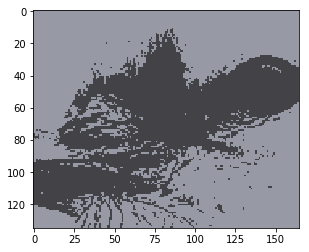

In [21]:
imgplot = plt.imshow(img_final)

In [24]:
mpimg.imsave('new_image.jpg',img_final)